## Imports

In [1]:
library(tidyverse)
library(broom)
library(GGally)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6      v purrr   0.3.4 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.0      v stringr 1.4.1 
v readr   2.1.2      v forcats 0.5.2 

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'tibble' was built under R version 4.1.3"
Warning message:
"package 'tidyr' was built under R version 4.1.2"
Warning message:
"package 'readr' was built under R version 4.1.2"
Warning message:
"package 'dplyr' was built under R version 4.1.3"
Warning message:
"package 'stringr' was built under R version 4.1.3"
Warning message:
"package 'forcats' was built under R version 4.1.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  me

## Read the data

In [2]:
data <- read_csv("data/Employee.csv")
head(data)

Rows: 4653 Columns: 9
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


In [3]:
str(data)

spec_tbl_df [4,653 x 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Education                : chr [1:4653] "Bachelors" "Bachelors" "Bachelors" "Masters" ...
 $ JoiningYear              : num [1:4653] 2017 2013 2014 2016 2017 ...
 $ City                     : chr [1:4653] "Bangalore" "Pune" "New Delhi" "Bangalore" ...
 $ PaymentTier              : num [1:4653] 3 1 3 3 3 3 3 3 3 2 ...
 $ Age                      : num [1:4653] 34 28 38 27 24 22 38 34 23 37 ...
 $ Gender                   : chr [1:4653] "Male" "Female" "Female" "Male" ...
 $ EverBenched              : chr [1:4653] "No" "No" "No" "No" ...
 $ ExperienceInCurrentDomain: num [1:4653] 0 3 2 5 2 0 0 2 1 2 ...
 $ LeaveOrNot               : num [1:4653] 0 1 0 1 1 0 0 1 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Education = col_character(),
  ..   JoiningYear = col_double(),
  ..   City = col_character(),
  ..   PaymentTier = col_double(),
  ..   Age = col_double(),
  ..   Gender = col_character(),
  ..   EverBenched = col_char

In [4]:
summary(data)

  Education          JoiningYear       City            PaymentTier   
 Length:4653        Min.   :2012   Length:4653        Min.   :1.000  
 Class :character   1st Qu.:2013   Class :character   1st Qu.:3.000  
 Mode  :character   Median :2015   Mode  :character   Median :3.000  
                    Mean   :2015                      Mean   :2.698  
                    3rd Qu.:2017                      3rd Qu.:3.000  
                    Max.   :2018                      Max.   :3.000  
      Age           Gender          EverBenched       
 Min.   :22.00   Length:4653        Length:4653       
 1st Qu.:26.00   Class :character   Class :character  
 Median :28.00   Mode  :character   Mode  :character  
 Mean   :29.39                                        
 3rd Qu.:32.00                                        
 Max.   :41.00                                        
 ExperienceInCurrentDomain   LeaveOrNot    
 Min.   :0.000             Min.   :0.0000  
 1st Qu.:2.000             1st Qu.:0.

In [5]:
colSums(is.na(data))

Education               JoiningYear                      City 
                        0                         0                         0 
              PaymentTier                       Age                    Gender 
                        0                         0                         0 
              EverBenched ExperienceInCurrentDomain                LeaveOrNot 
                        0                         0                         0

In [6]:
unique(data$Education)

[1] "Bachelors" "Masters"   "PHD"

In [7]:
unique(data$City)

[1] "Bangalore" "Pune"      "New Delhi"

### Metadata information on dataset
- The dataset contains information on the employees of a certain company. 
- The name of the company and the employees' personal information is ommited for privacy reasons. 
- The dataset contains the employees' educational backgrounds, work history, demographics, and employment-related factors. 
- The data within the dataset is collected by the HR department of the company providing the data.

### Initial general observations
- The dataset contains 9 variables and 4653 observations
- Numerical variables are JoiningYear, Age, ExperienceInCurrentDomain
- Categorical variables are Education, City, PaymentTier, Gender, EverBenched, LeaveOrNot
- No missing values within all observations

### Variable explanations 
- Education: A categorical variable describing the level of education employees had when working with the company. The factors are "Bachelors", "Masters", "PHD"
- JoiningYear: A numerical variable describing when employees joined the company. The earliest year is 2012 and the latest is 2018 with employees on average joining in year 2015.
- City: A categorical variable describing the city where the employees were working from. The cities recorded within this dataset are "Bangalore", "Pune" and "New Delhi". Considering the distance between the three cities, either the company had multiple offices at different cities, or the employees are working remote.
- PaymentTier: A categorical variable describing the amount of salary is being paid to the employees. The factors recorded within this dataset are 1, 2, and 3. There is no information on whether a higher number correlates to a higher salary. Considering the median is 3 and the mean is close to 3, it is likely that a payment tier of 1 is the highest paying salary while a payment tier of 3 is the lowest paying salary.
- Age: A numerical variable describing the employees' age durign employment at the company. The youngest employee is 22 and the oldest is 41 with the average age being 29 years old.
- Gender: A categorical variable describing the biological gender of the employees. The factors recorded within this dataset are "Male" and "Female". 
- EverBenched: A boolean categorical variable describing whether an employee has ever been benched without assigned work.
- ExperienceInCurrentDomain: A numerical variable describing the number of years of experience an employee has in the field of work the company is in. The minimum is 0 years and the maximum is 7 years with the average being around 3 years of experience.
- LeaveOrNot: A categorical variable describing whether an employee left the company or not. The proportion of employees leaving the company is 0.345

## Question/Problem
I am interested in predicting whether an employee will leave the company. I will also be able to find which variables affects whether an employee leaves the company the most. As such, it will be both a prediction problem (predicting whether employee will leave the company) and an inference problem (Which variables affects an employee leaving the company the most).

The variable of interest is LeaveOrNot. The explanatory variables that are relavant are Education, Joining Year, City, Payment Tiers, Gender, EverBenched. Age and Experience in Domain are variables that have questionable relavance to the variable of interest. This is seen further below during EDA.

## EDA

### vs. Response Variable (LeaveOrNot)

- Education

Since the proportion of employees leaving changes depending on education, the Education variable might be a good explanatory variable. However, there is a disproportion between employees who have PHD education and employees who have Bachelors and Mastrers education. There are very few employees who have PHD education. As such, it might cause an issue when splitting the dataset for variable selection and fitting the model where one set of data will have few to no employees with PHD education.

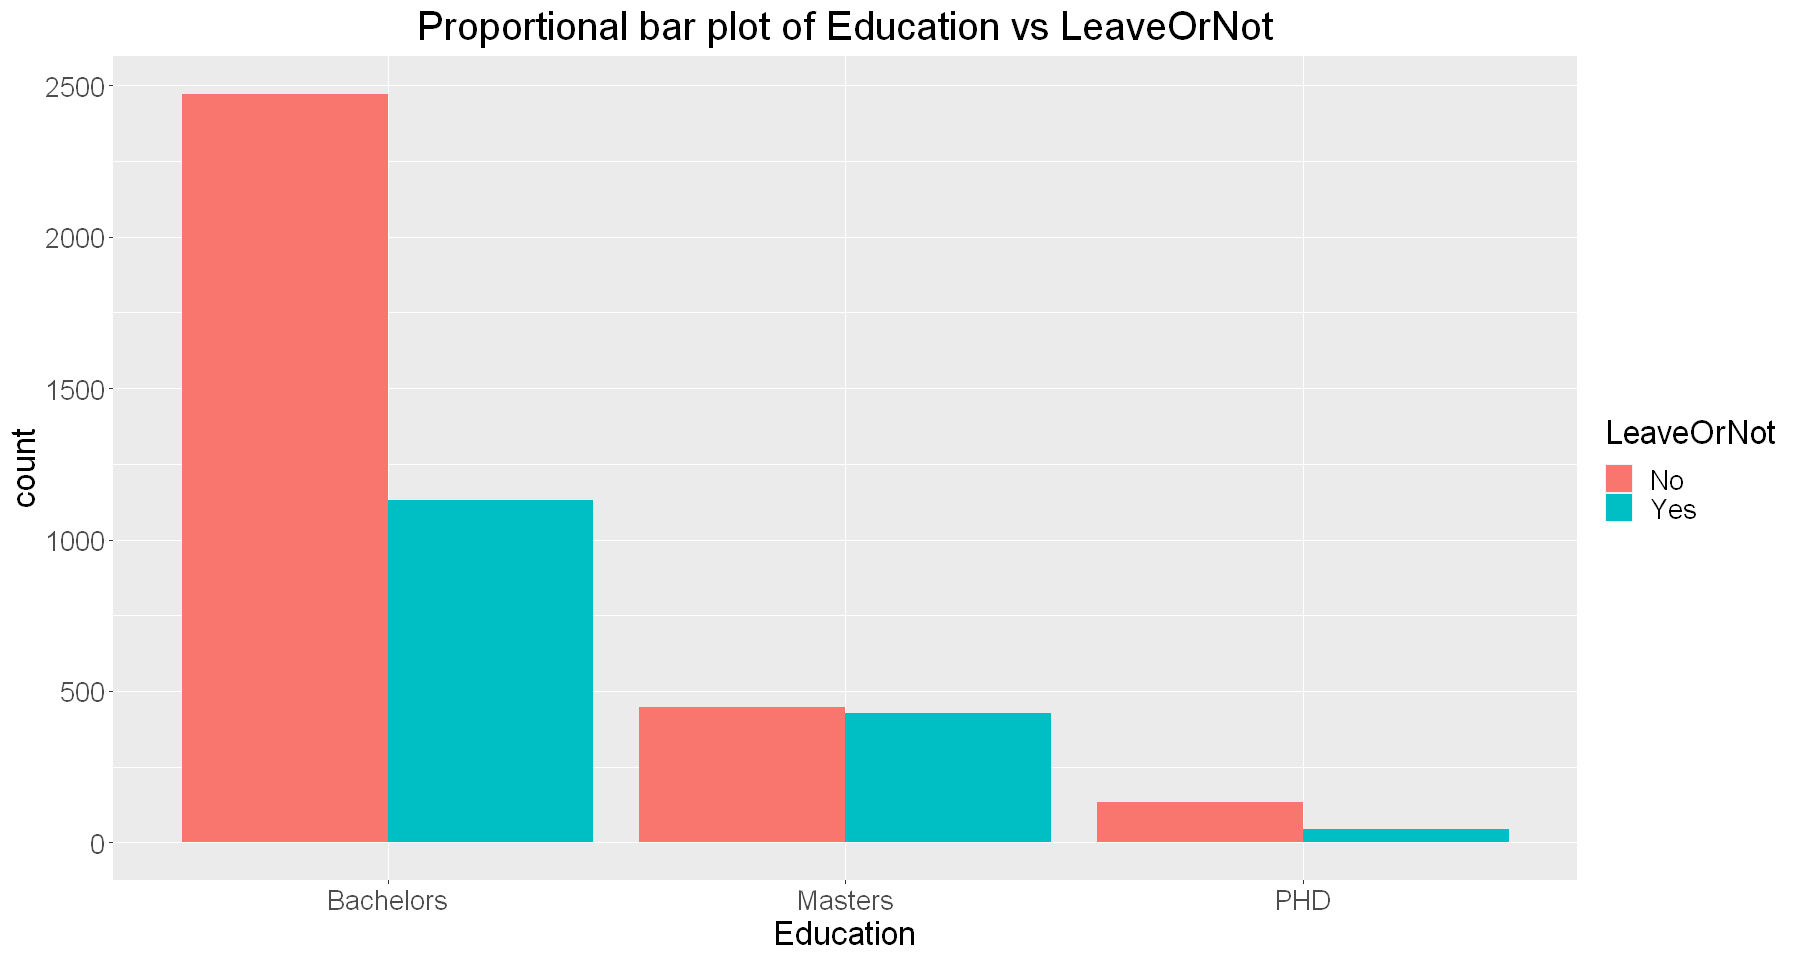

In [8]:
options(repr.plot.width=15, repr.plot.height=8)

data$LeaveOrNot[data$LeaveOrNot == 1] <- 'Yes'
data$LeaveOrNot[data$LeaveOrNot == 0] <- 'No'

data |>
    ggplot(aes(x = Education, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") + 
    ggtitle("Proportional bar plot of Education vs LeaveOrNot") + 
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

- Joining Year

The proportions of employees leaving seems to change as the joining year changes. In 2018, almost all employees chose to leave while in 2017 most employees chose to stay. Since the proportion changes, it might be a good explanatory variable

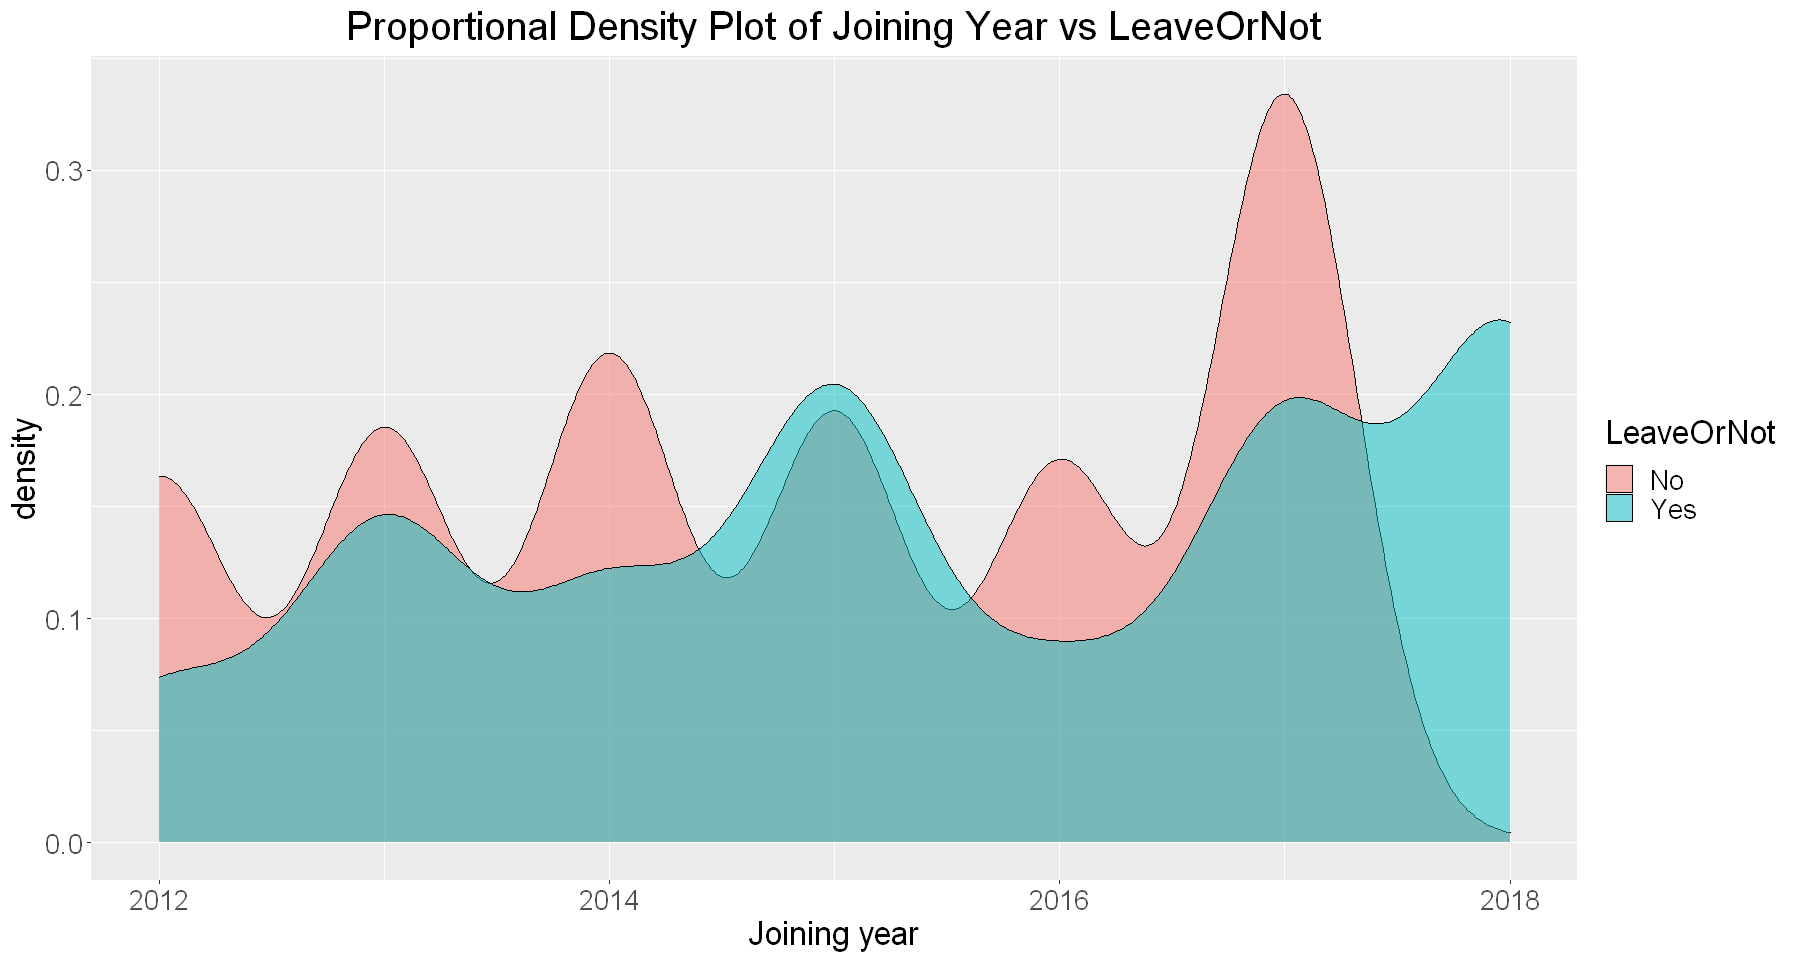

In [9]:
data |>
    ggplot(aes(x = JoiningYear, fill = LeaveOrNot)) +
    geom_density(alpha = 0.5) +
    xlab("Joining year") +
    ggtitle("Proportional Density Plot of Joining Year vs LeaveOrNot") + 
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

- City

Half of the employees in this company seems to be from Bangalore. The number of employees leaving seems to be similar from each city but the proportion is different. As such, City of residence might be a good explanatory variable.

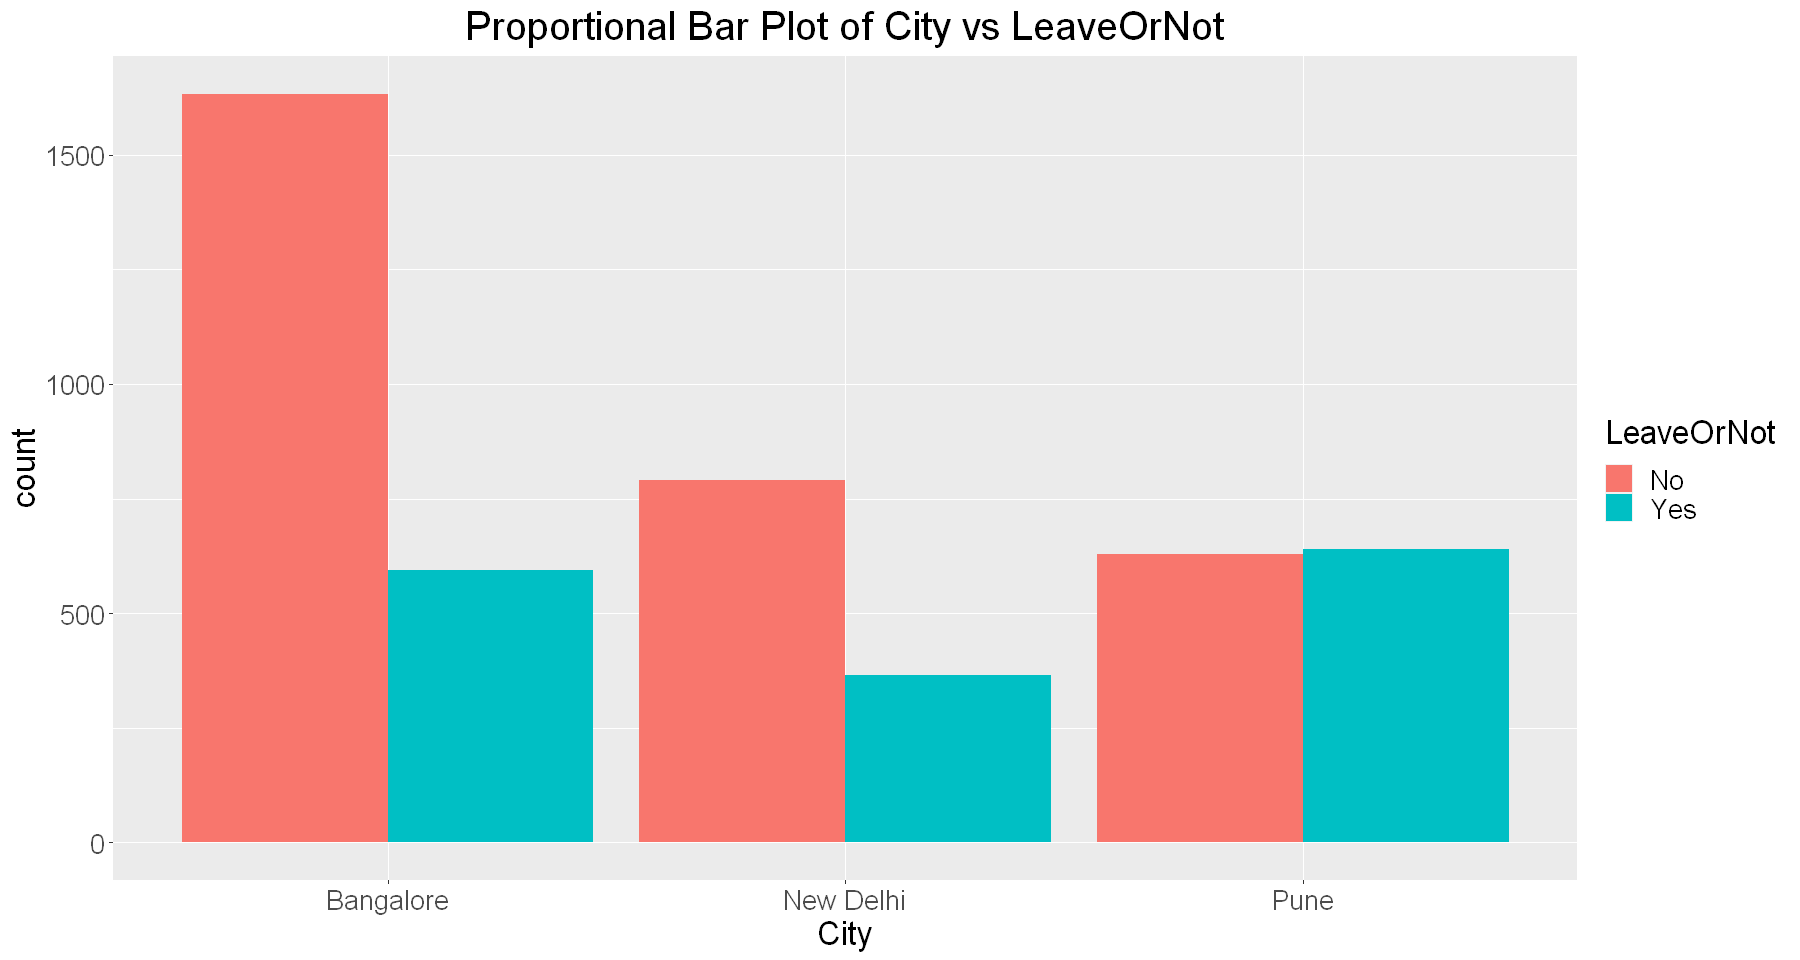

In [10]:
data |>
    ggplot(aes(x = City, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") + 
    ggtitle("Proportional Bar Plot of City vs LeaveOrNot") + 
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

- Payment Tiers

The proportion of employees leaving seems to differ between payment tiers. The payment tier 2 have more employees leaving than staying, while payment tier 1 and 3 have more employees staying than leaving. As such, it might be a good explanatory variable. However, there is a disproportion between employees who have payment tier 1 and employees with payment tier 2 and 3. There are very few employees who have payment tier 1. As such, it might cause an issue when splitting the dataset for variable selection and fitting the model where one set of data will have few to no employees with payment tier 1.

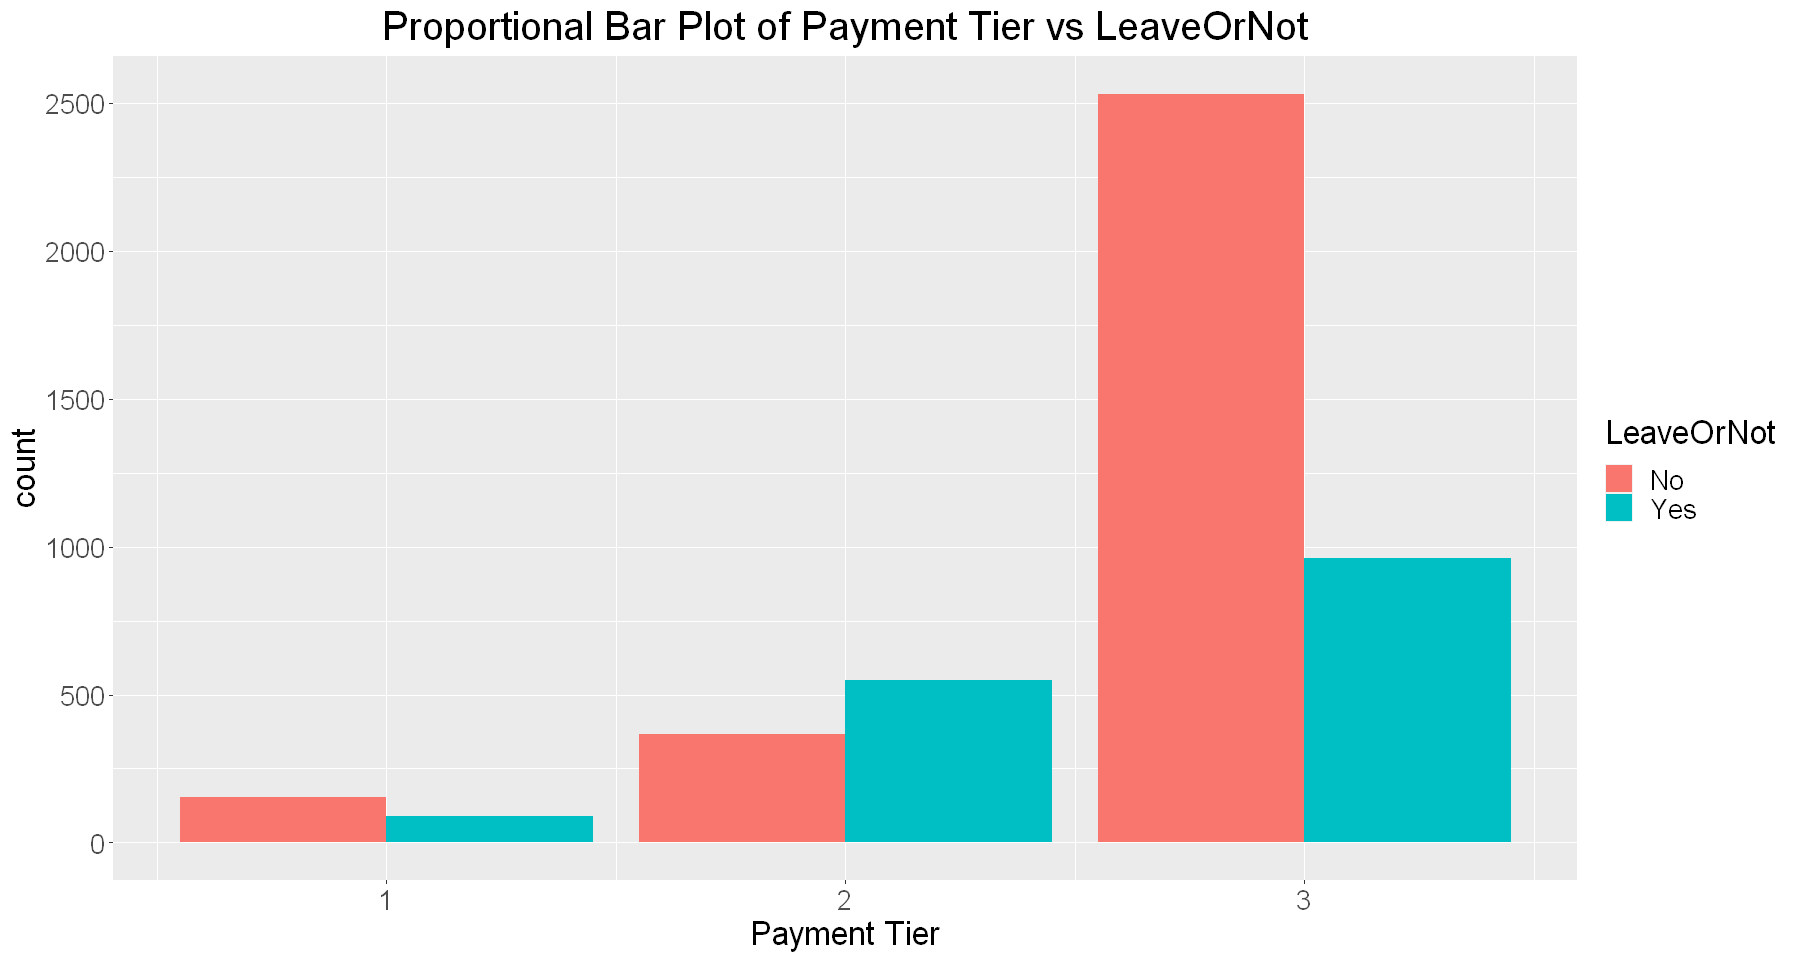

In [11]:
data |>
    ggplot(aes(x = PaymentTier, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") + 
    ggtitle("Proportional Bar Plot of Payment Tier vs LeaveOrNot") + 
    xlab("Payment Tier") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

- Age

Since age of employees leaving and staying within the company seems to be have a lot of overlap, age by itself might not be a good explanatory variable for whether an employee leaves the company. However, combined with other variables, it might prove to be a useful explanatory variable.

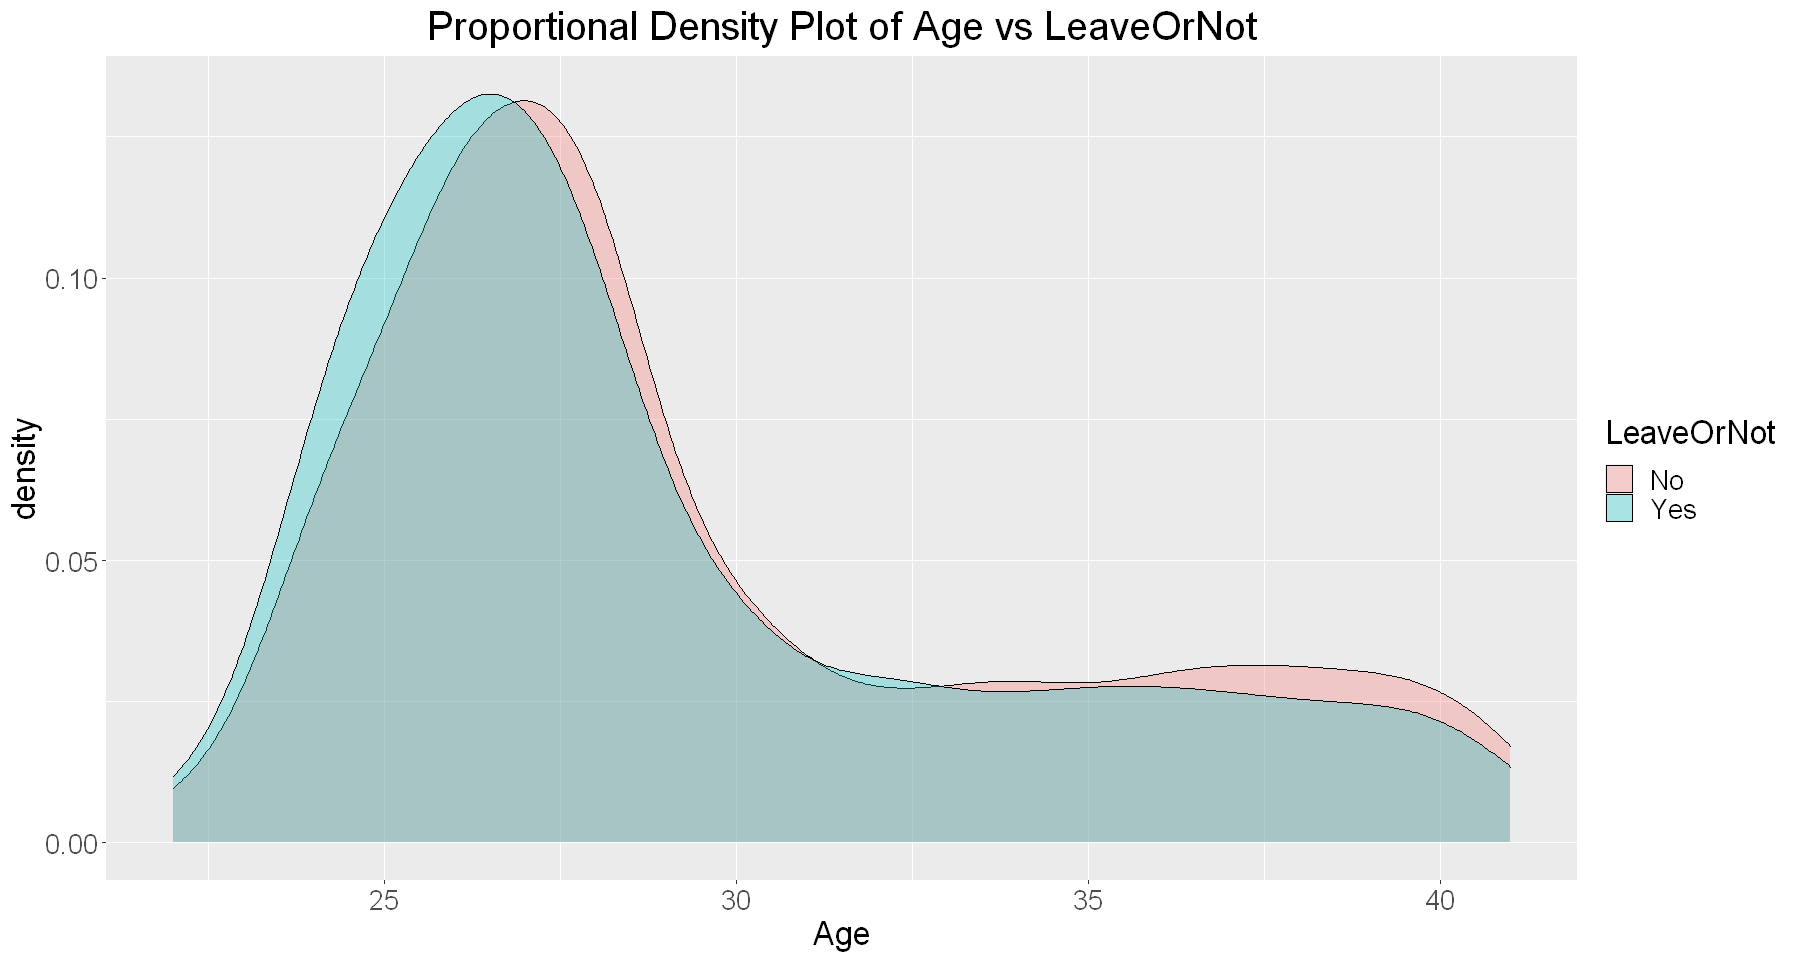

In [12]:
data |>
    ggplot(aes(x = Age, fill = LeaveOrNot)) +
    geom_density(alpha = 0.3) +
    ggtitle("Proportional Density Plot of Age vs LeaveOrNot") + 
    xlab("Age") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

- Gender

It seems that the number of employees leaving the company is about the same for both genders. However, since there is a smaller proportion of male employees leaving the company than female employee, gender might be a good explanatory variable for whether an employee leaves the company.

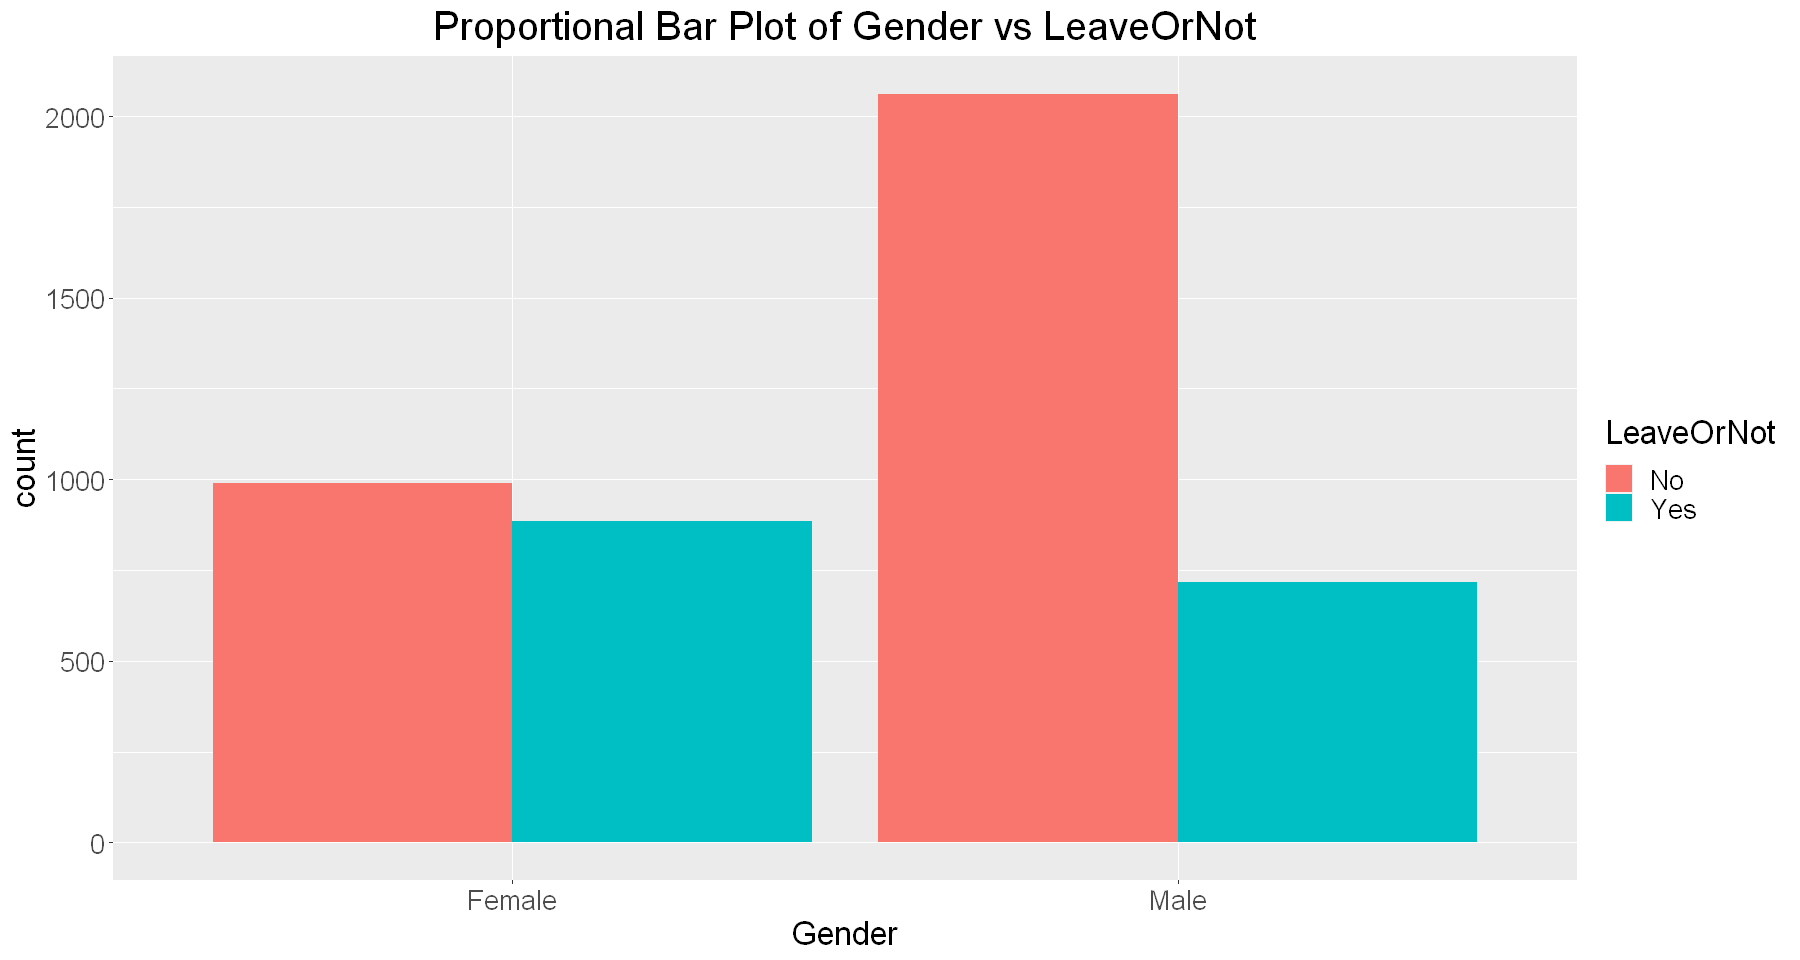

In [13]:
data |>
    ggplot(aes(x = Gender, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    ggtitle("Proportional Bar Plot of Gender vs LeaveOrNot") + 
    xlab("Gender") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

- EverBenched

The proportion of employees leaving seems to change depending on whether they have been benched before. Employees that have been benched seems to leave around half of the time while employees who have not been benched seems to leave only a third of the time. As such, EverBenched might be a good explanatory variable. However, there is a disproportion between employees who have been benched and employees who have not been bench. There are very few employees who have ever been benched. As such, it might cause an issue when splitting the dataset for variable selection and fitting the model where one set of data will have few to no employees who are ever benched.

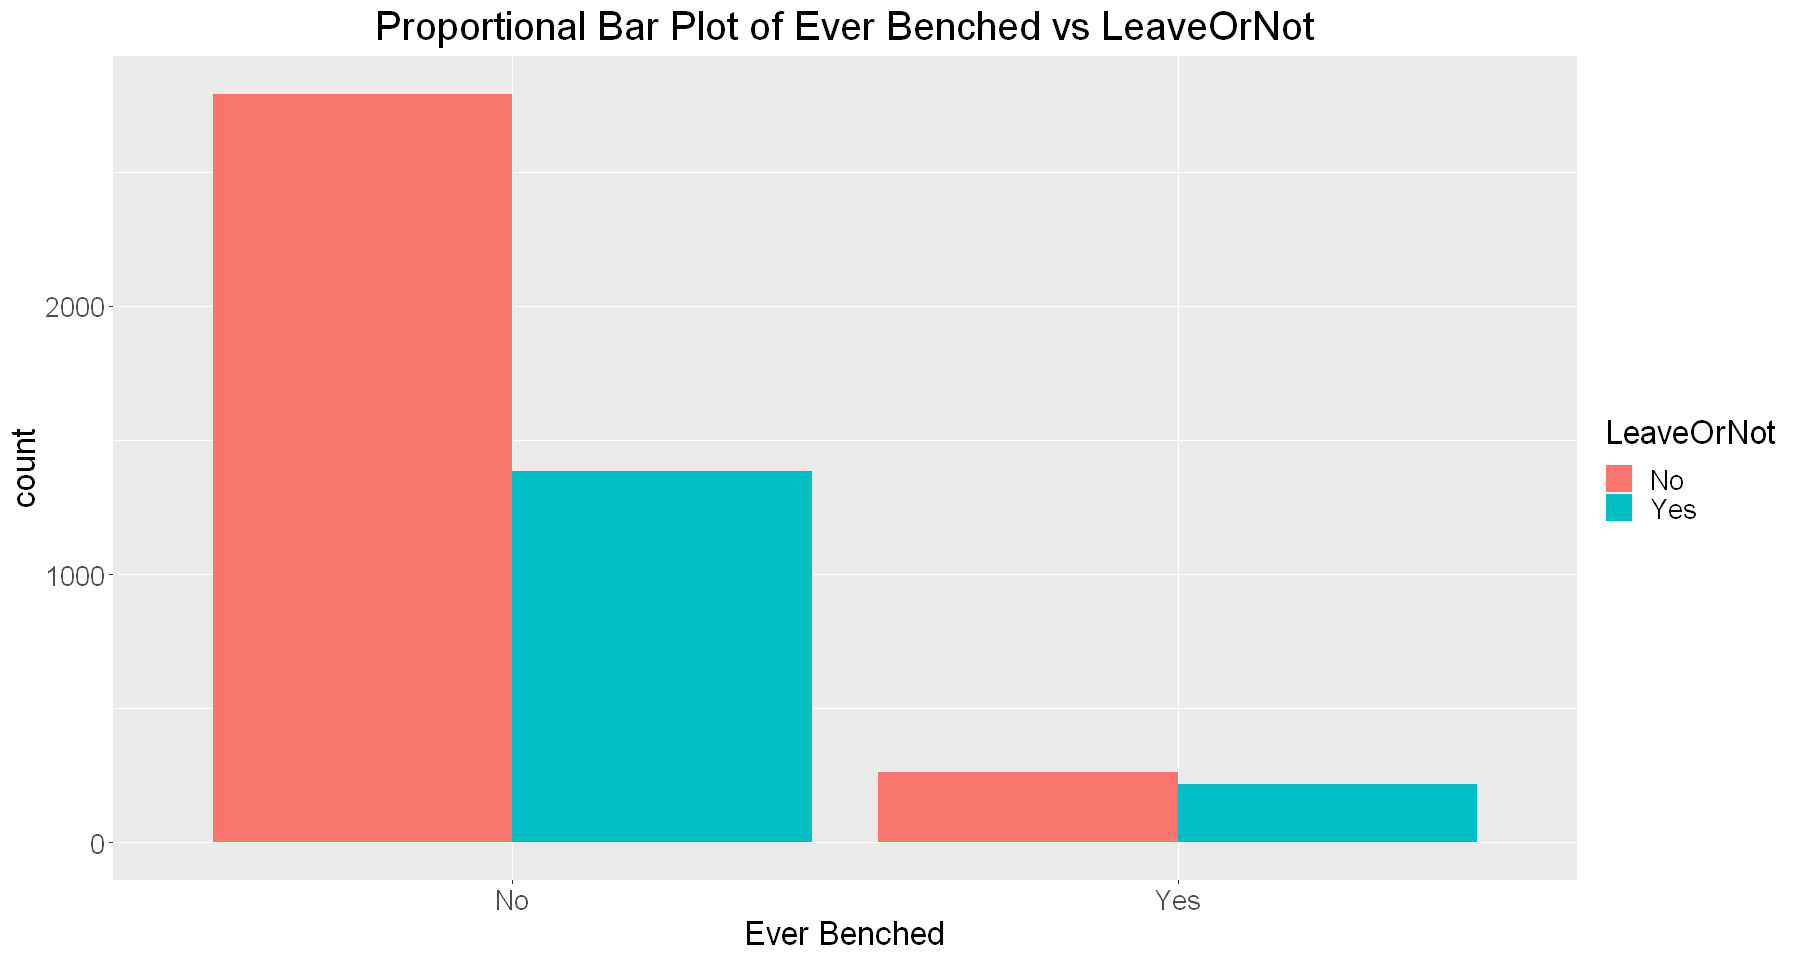

In [14]:
data |>
    ggplot(aes(x = EverBenched, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    ggtitle("Proportional Bar Plot of Ever Benched vs LeaveOrNot") + 
    xlab("Ever Benched") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

- Experience In Current Domain

It seems there is also a fair bit of overlap between the proportion of employees staying and leaving the company based on experience in the company's domain. As such, this variable might not be a very good explanatory variable by itself. Combined with other variables, it might prove to be a decent explanatory variable.

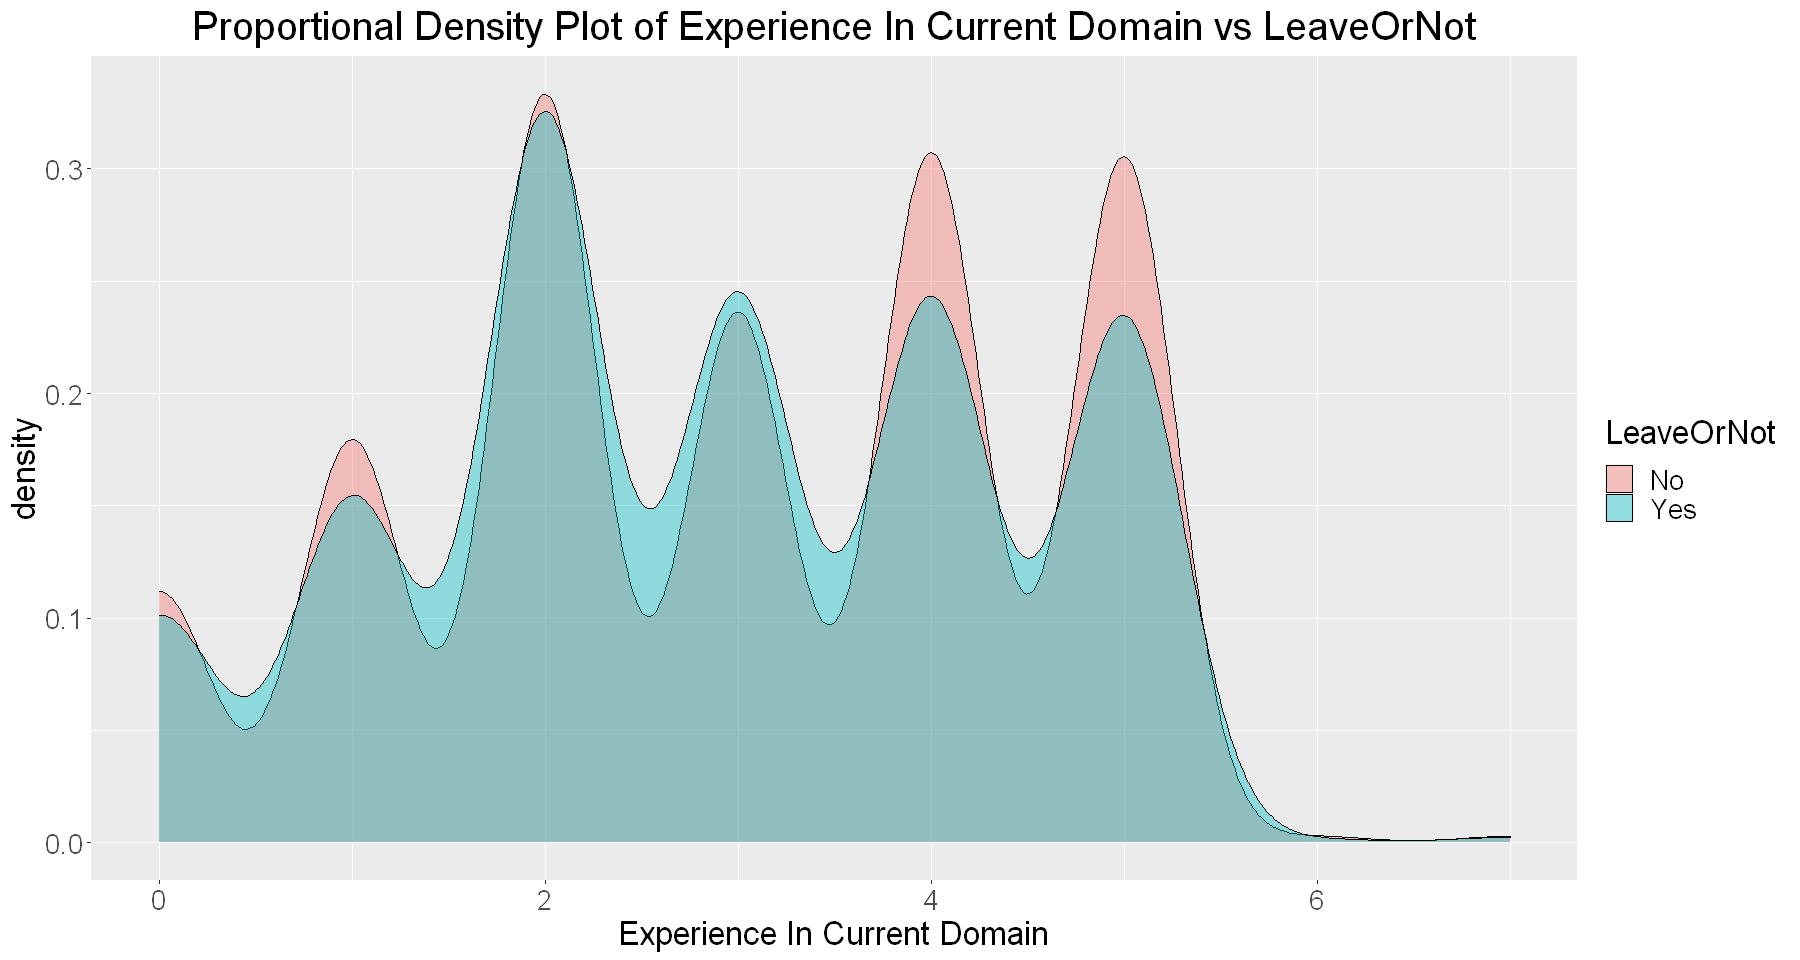

In [15]:
data |>
    ggplot(aes(x = ExperienceInCurrentDomain, fill = LeaveOrNot)) +
    geom_density(alpha = 0.4) +
    ggtitle("Proportional Density Plot of Experience In Current Domain vs LeaveOrNot") + 
    xlab("Experience In Current Domain") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

### Correlation Assessment

In [16]:
print(paste("Correlation between (JoiningYear) and (Age) is", cor(data$JoiningYear, data$Age)))
print(paste("Correlation between (JoiningYear) and (ExperienceInCurrentDomain) is ", cor(data$JoiningYear, data$ExperienceInCurrentDomain)))
print(paste("Correlation between (Age) and (ExperienceInCurrentDomain) is ", cor(data$Age, data$ExperienceInCurrentDomain)))

[1] "Correlation between (JoiningYear) and (Age) is 0.0131652929658725"
[1] "Correlation between (JoiningYear) and (ExperienceInCurrentDomain) is  -0.0365246175794661"
[1] "Correlation between (Age) and (ExperienceInCurrentDomain) is  -0.134642850836931"


It seems none of the numerical variables have high correlation which is good since it means we don't have multicolinear variables.

## Summary

- Almost all variables are potentially relevant to the response variable with the exception of Age and Experience in Current Domain. 
- The correlation between all continuous variables are low as such, no multicollinearity issues should arise from the explanatory variables.
- Education, Payment Tier, and Ever Benched have "rare cases" where a factor within the categorical variables only have a few observations. As such, it might cause an issue when splitting the data to do variable selection and model fitting where one of the two split data might not contain the "rare case" factor within these categorical variables.